# Tutorial: Basics of plotting

This lab serves as an introduction to data visualization in R.

## Goals:
* Learn the basics of using `ggplot2`

---
# Plotting & distributions

`ggplot2` is an R package for creating figures. It has many strengths over the base R graphics, including being easier to use. Since you could write a whole book on ggplot2 [(and, in fact, there is one)](https://www.amazon.com/dp/0387981403/ref=cm_sw_su_dp?tag=ggplot2-20), the goal of this tutorial isn't to present everything in detail, but to walk you through the basic use and structure of ggplot2 commands and to give you some examples. This will give you the basic tools needed to use ggplot2 and from there you can find additional information as to how to do things in various places. Before we get to the basics, here are two very useful references if you ever feel lost or need more information:

1. [Reference sheet of ggplot2 elements and commands](http://ggplot2.tidyverse.org/reference/)
2. [ggplot2 cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-visualization.pdf)

In the tutorial below we'll be using the `diamonds` dataset from the ggplot2 package. It contains "the prices and other attributes of almost 54,000 diamonds". You can get information about the variables by typing `?diamonds'` or at this [link](http://ggplot2.tidyverse.org/reference/diamonds.html).

## Basics first

The two basic ideas behind `ggplot2` are that:
1. You add elements to a plot in layers
2. You create a *mapping* between plot elements. Plot elements can include things like the x-axis, y-axis, color of data points, etc, and variables in your data.frame.

In `ggplot2` the different layers are called *geoms* (a geometric object), and the mappings between elements and data is called an *aes* (an aesthetic object).

Here's an example of a ggplot2 function, that we'll dissect:

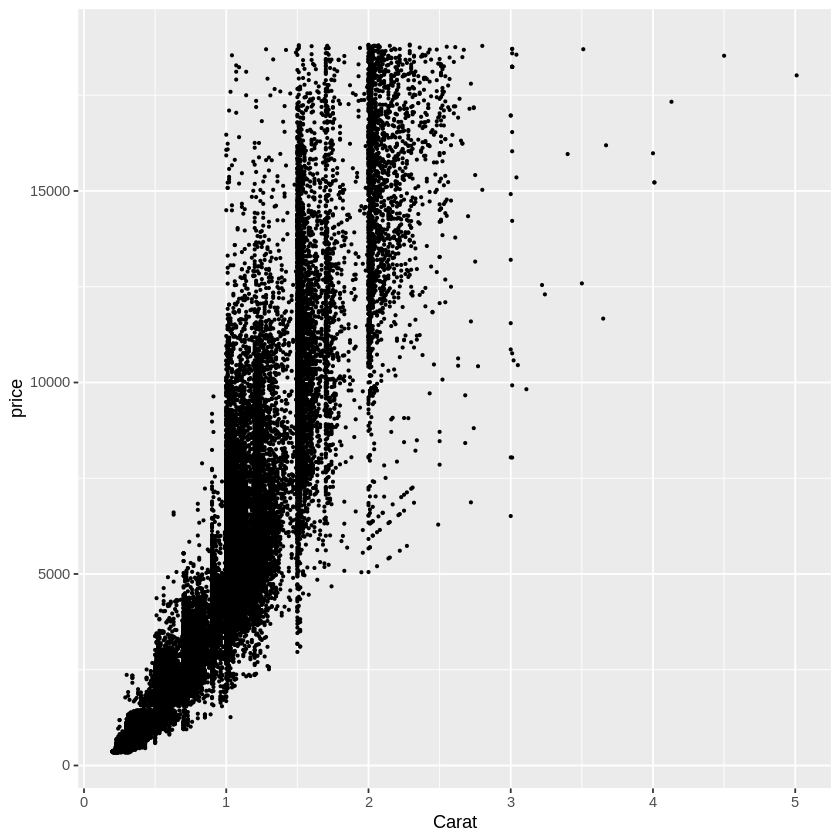

In [ ]:
# set the size of the plot for the notebook
options(repr.plot.width=7, repr.plot.height=7)
library(tidyverse)#load the library - ggplot2 is included in tidyverse, and we'll use some of the other data manipulation functions too

ggplot(diamonds, aes(x=carat, y=price)) + #diamonds = the dataframe & aes() maps the carat variable to the x axis [...]
    geom_point(size=0.5) + #set size of the points plotted
    scale_x_continuous(name = 'Carat') #can set the x-tick interval/limits, here, I give it a name

The above function contains almost all of the basic **ggplot components** in their simplest form. Namely:
* main statement **ggplot(...)** - initializes the plot
    * data object - the first elements is always the data.frame which contains the data for plotting
    * aestethics, **aes()** - function in which we specify what variables to map to the x axis, y axis, color, fill, shape, linetype, etc
* geoms (e.g. **geom_point(...)**) - creates a new layer with the plot type in question
* changing formatting (e.g. **scale_x_continuous(...)**) - in this case gives a name to the x_axis

**_Note_**: as you may have noticed, different functions in ggplot are linked by a **`+`** sign. You can insert a new line after each plus sign, in order to help readibility. In ggplot, + signs between functions should be interpreted as "add layer" or "add formatting instructions", not as algebraic addition.

Here are the components labeled on the function:

![picture](https://drive.google.com/uc?export=view&id=1cFOvatsCpFjf-zHX5Ydtf-n-Twm3W8_p)

## Aesthetics

Aside from formatting the x and y axes, you can change the following aspects of the plot according to variables in your dataframe:

* color: color of the points/lines, etc
* fill: the fill color of bar graphs, box plots, histograms, etc
* shape: shape of points on a scatterplot
* size: size of points on a scatterplot
* linetype: solid, dashed, etc
* alpha: transparency of elements

Here are examples with each:

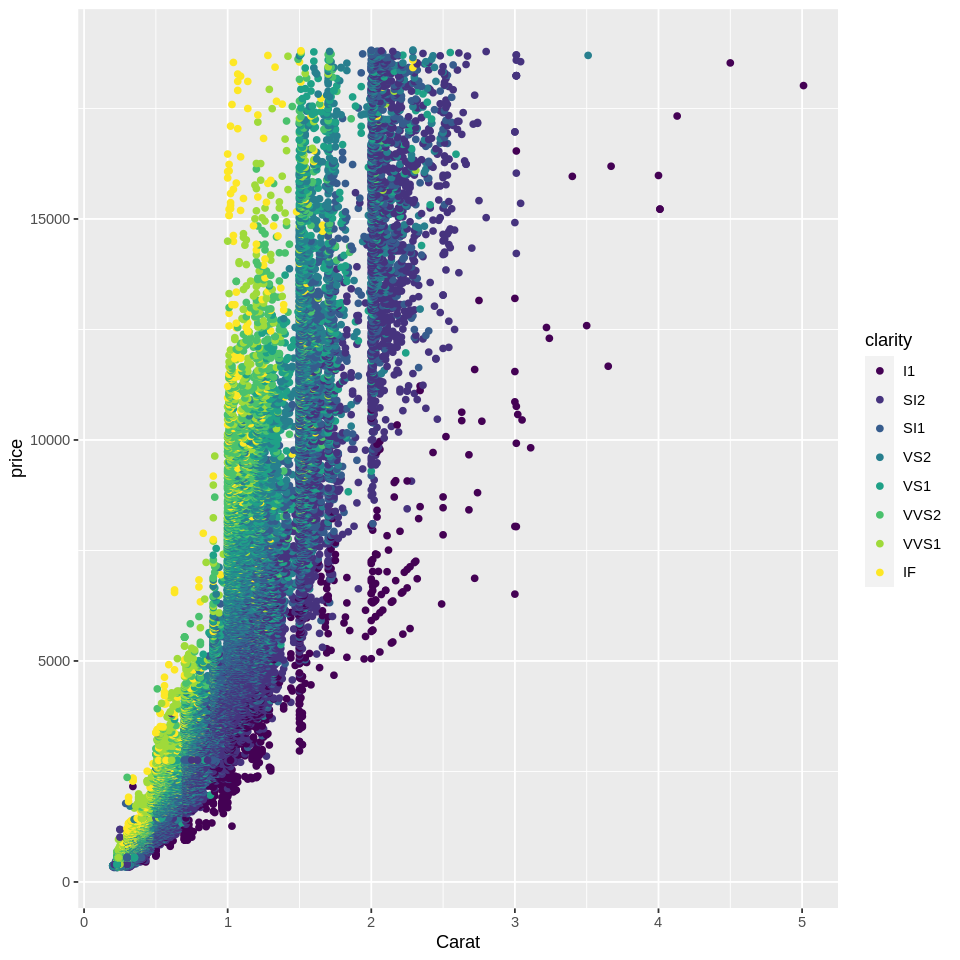

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
# Change color of points as a function of their clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


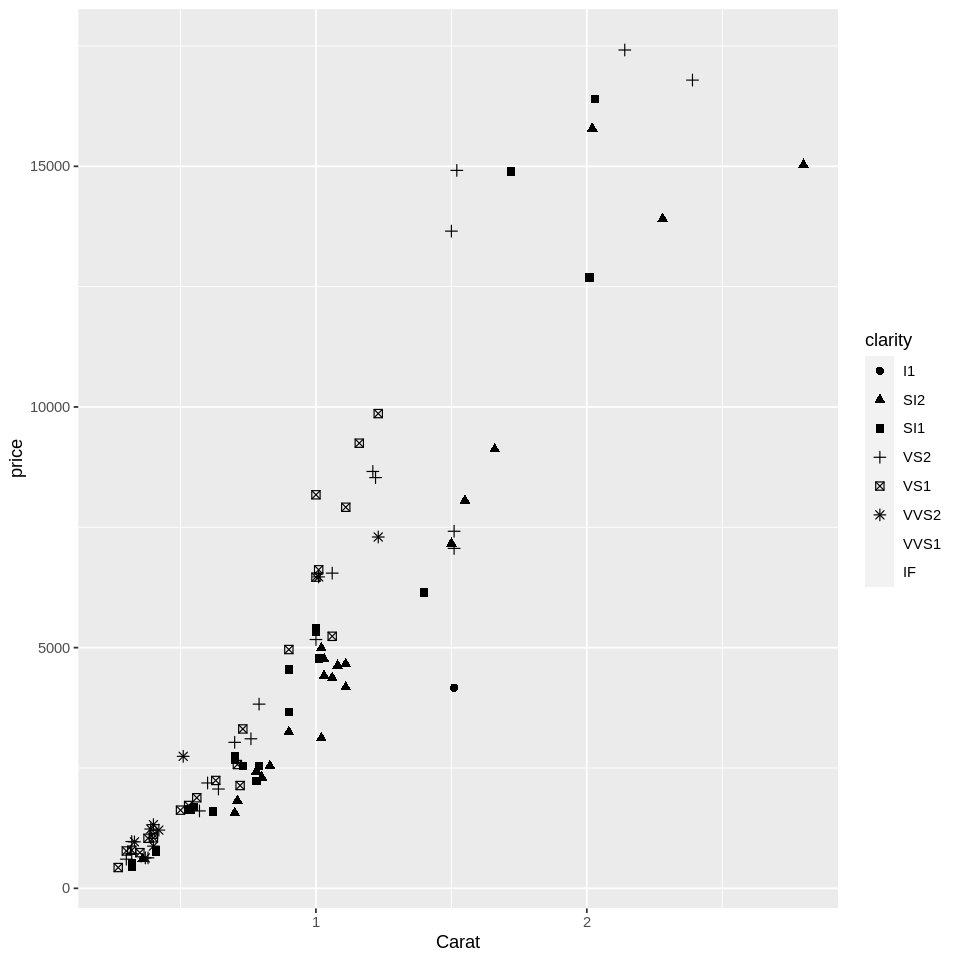

In [ ]:
# get a smaller subset of data, to reduce overplotting
dsmall <- diamonds[sample(nrow(diamonds), 100), ] #randomly sample 100 data points

# Scatter plot of diamond price as a function of their carat and clarity
ggplot(dsmall, aes(x=carat, y=price, shape=clarity)) + #change shape with clarity
    geom_point(size=2) +
    scale_x_continuous(name = 'Carat')

#as the first warning mentions, clarity is an ordinal variable because clarity ratings are ordered -
# ggplot is telling us that shapes aren't the best way to convey ordinal information.
#as the second warning below mentions, there are limits to the automatic assignment of shapes
# may need to specify explicit assignments if n_shapes (or any plot element)
# exceeds automated capacity

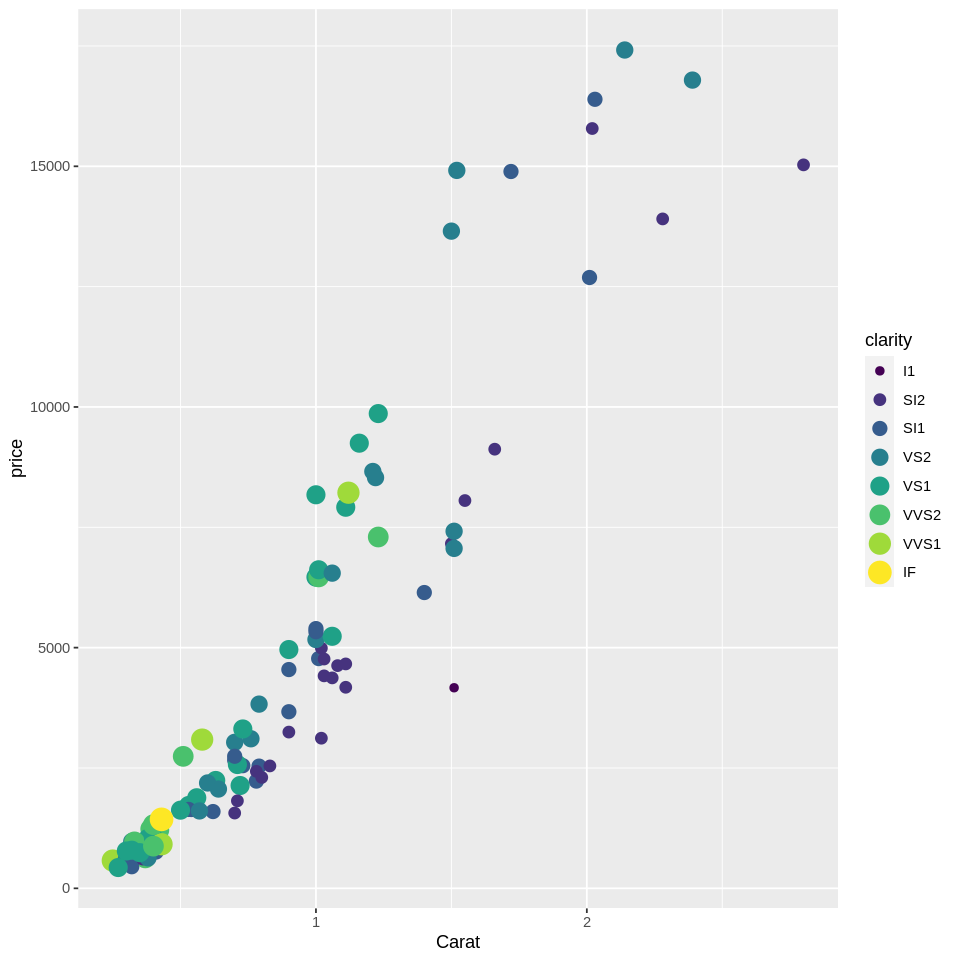

In [ ]:
# Scatter plot of diamond price as a function of their carat and clarity
#clarity according to size AND color
ggplot(dsmall, aes(x=carat, y=price, size=clarity, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

## Geoms

There are four broad types of geoms, depending on whether you are plotting raw data (e.g., every data point should be displayed), data distributions (e.g. density plots, histograms), summary data (e.g., only the mean of variable y for each level of x), and model_fits (e.g. fitting a regression line to the data).

__Raw data is plotted with__:
* geom_point() - scatter plots
* geom_line() - line connecting datapoints
* geom_col() - bar chart
* geom_tile() - heatmap

__Distributions are plotted with (only specify an x variable - the y is calculated automatically by the distribution function)__ :
* geom_density() - density
* geom_histogram() - histograms
* geom_bar() - bar chart showing counts for each level of X (similar to histogram)

*_Note_ however, that you can change the default bandwidth selector used to calculate kernel density estimates if needed. Here's a [reference](https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/bandwidth) for the available options.*

__Summary data are plotted with__:
* stat_summary(fun.data="summarising_function", geom="typeofplot"), where typeofplot is point, line, col, etc, and the summarising function tells ggplot how to transform the data. The default function is `mean_se` and it return the mean and the standard error for the y variable for each level of x.
* stat_summary_2d() - same as stat_summary, but in this case you are summarizing a third variable called z, over all combination of levels of x and y. It will create a heatmap of sorts
* geom_violin() - violin plot
* geom_boxplot() - boxplot

__Automatic model fits can be plotted with__:
* geom_smooth()

**Remember that the type of plot you should use depends on your [purpose](https://github.com/ft-interactive/chart-doctor/blob/master/visual-vocabulary/Visual-vocabulary.pdf).**

### Correlation

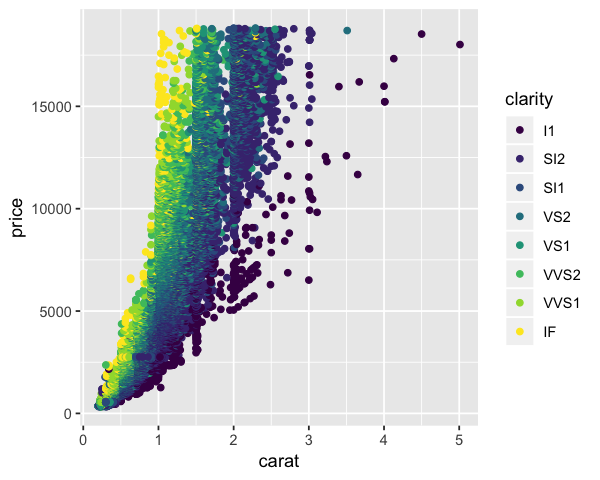

In [ ]:
# overplotting
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point()

There are a lot of raw data points. We could, instead, calculate the mean price for each value of carat and plot the results. Instead of writing our own function to do this, we can just call the ``stat_summary`` function while plotting:

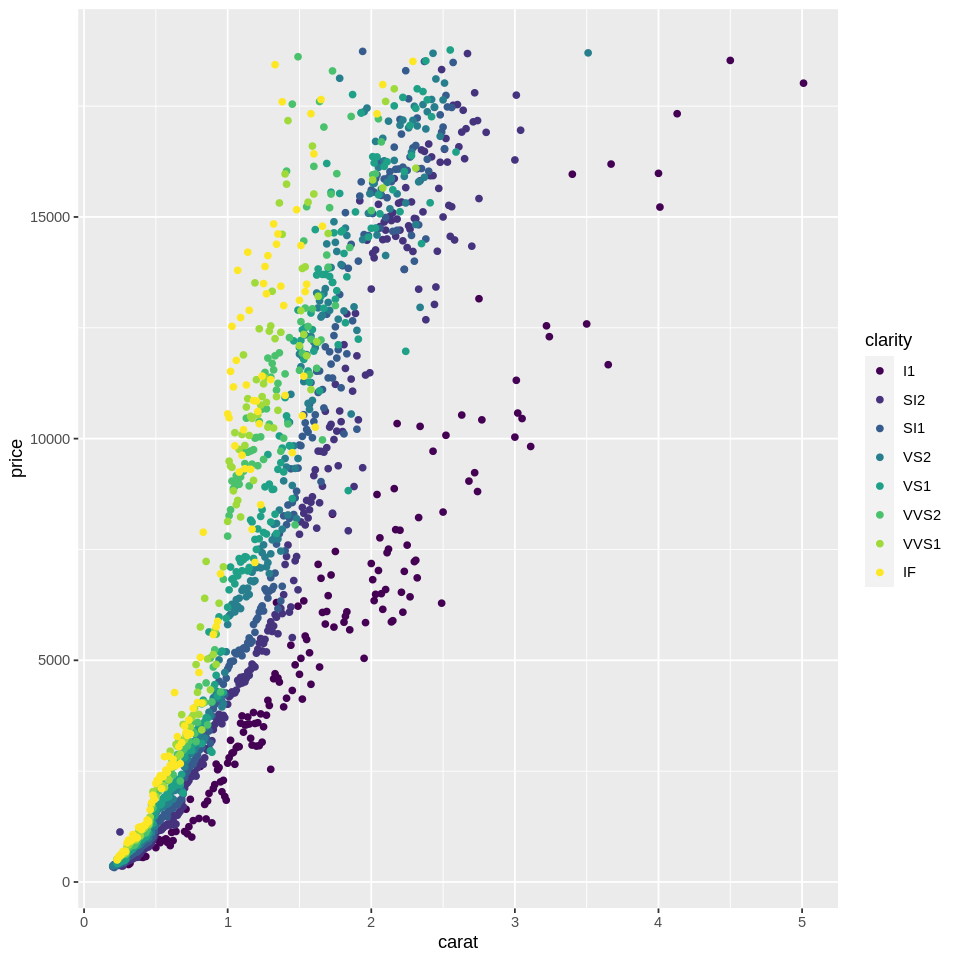

In [ ]:
# # summarized plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    stat_summary(geom='point',fun=mean)

In the plot above, rather than showing individual datapoints, we see the average price for each recorded carat level. But since carat is a continuous variable, it would make more sense if we bin carat into groups, and then plot the mean price for those groups. One easy way is to just round carat to one significant digit, which would give us 10 bins for each carat unit, e.g., 0.1, 0.2,.... We can transform the x variable directly in the ggplot function:

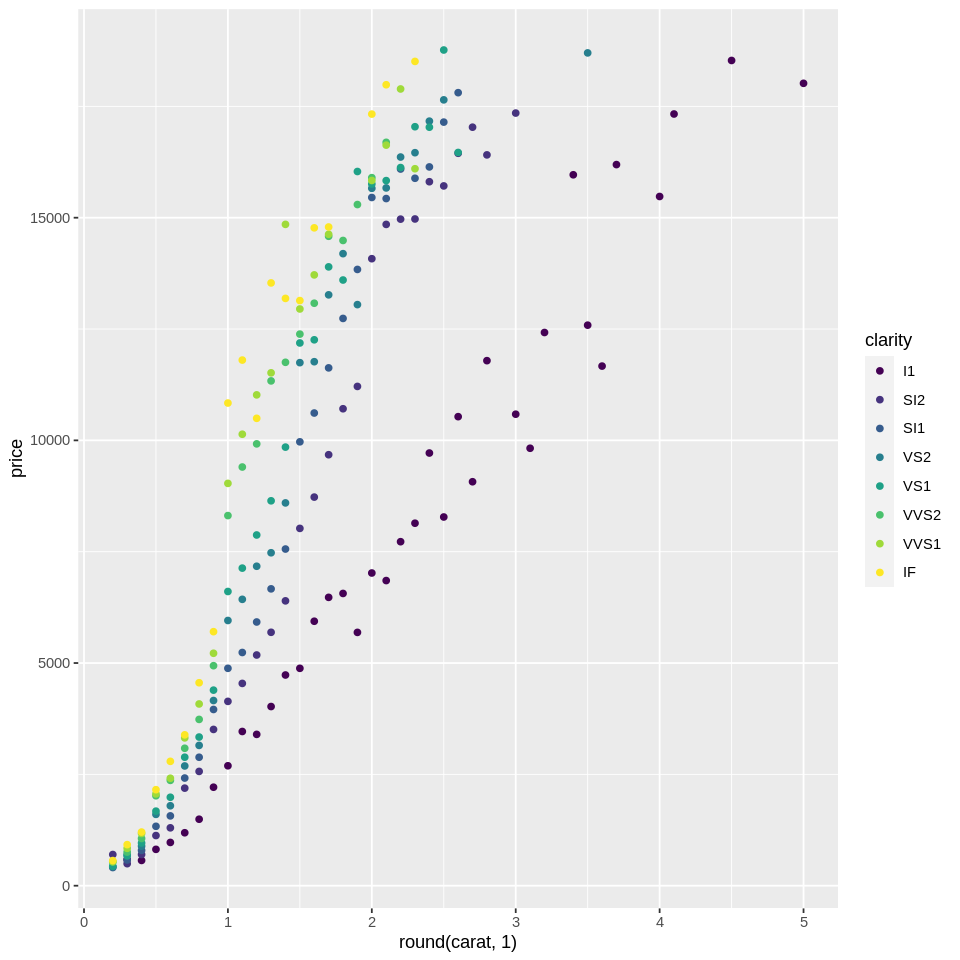

In [ ]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point', fun=mean)

This has made it much easier to see the general trend. It would help if we add a line connecting the dots. You can just layer geoms like this:

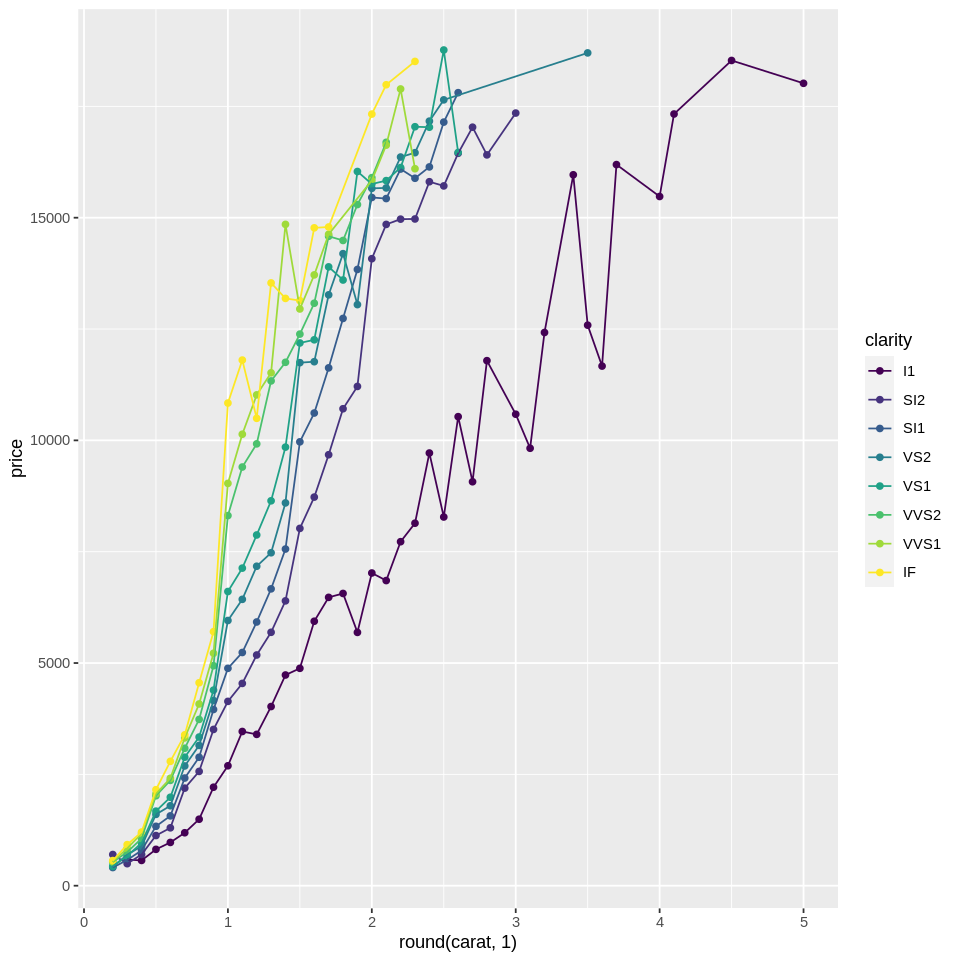

In [ ]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point',fun=mean) +
    stat_summary(geom='line',fun=mean) #you can layer geoms like this

One issue is that we have now lost the variability in price. To represent the variability, we can add error bars to each point:

No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 18 rows containing missing values (geom_segment).”


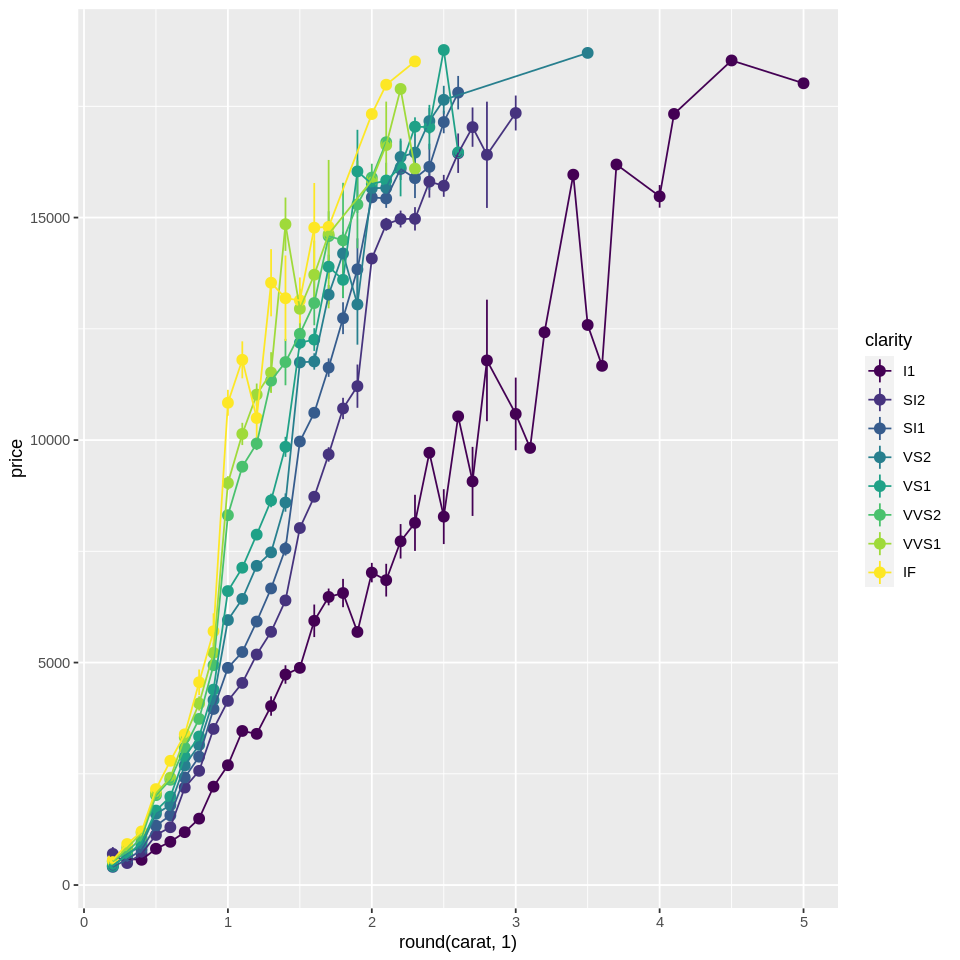

In [ ]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='pointrange') + #adding error bars in the form of a line with a range
    stat_summary(geom='point',fun=mean) +
    stat_summary(geom='line',fun=mean)

We see the error bars for many points, but not all. **Why?**

Well for higher-carat diamonds, there are fewer of them due to the expense/scarcity. And for some of the highgest values of carat, there is only a single price! To help with that we can:

1. create even bigger bins
2. transform carat and price variables with a logarithm - logarithms squash bigger values more than smaller values and would thus bring bigger values closer to each other.

Indeed, if we check the distribution of carat and price, we will see that they have a long-tailed skew, and would benefit from a log transformation for certain purposes. This will also illustrate how to create a histogram and a density plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



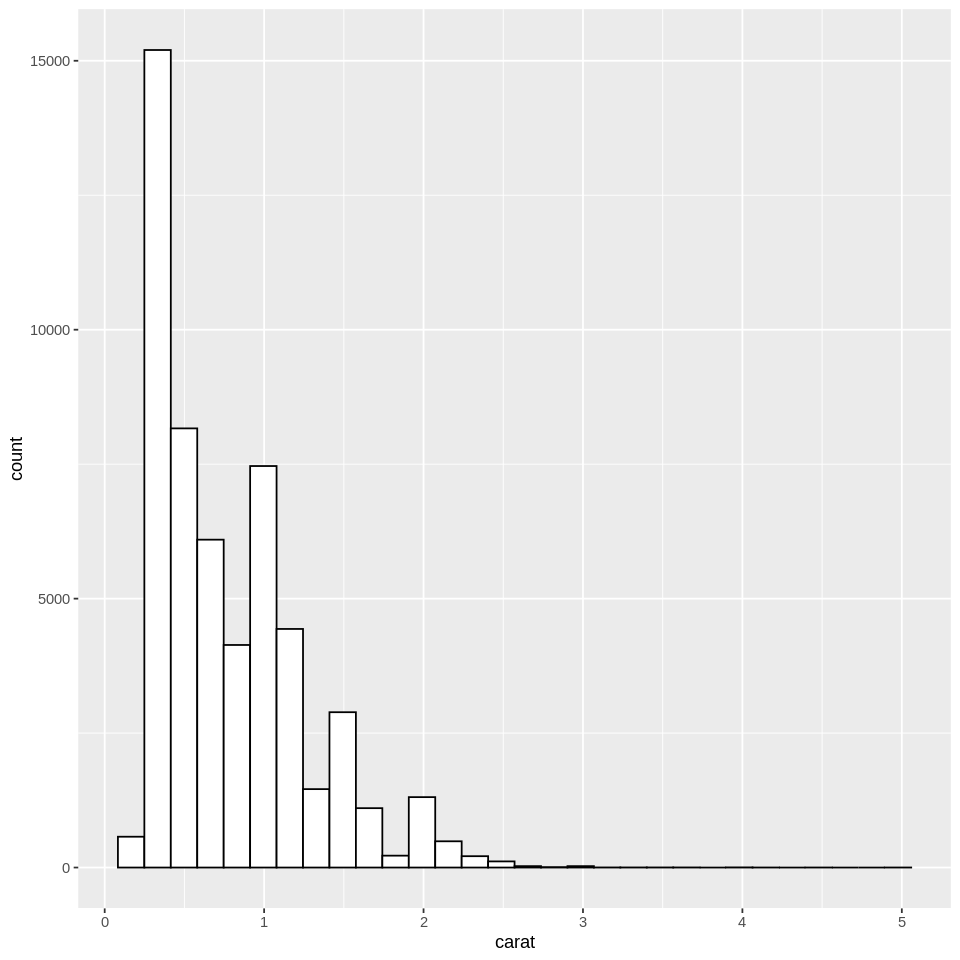

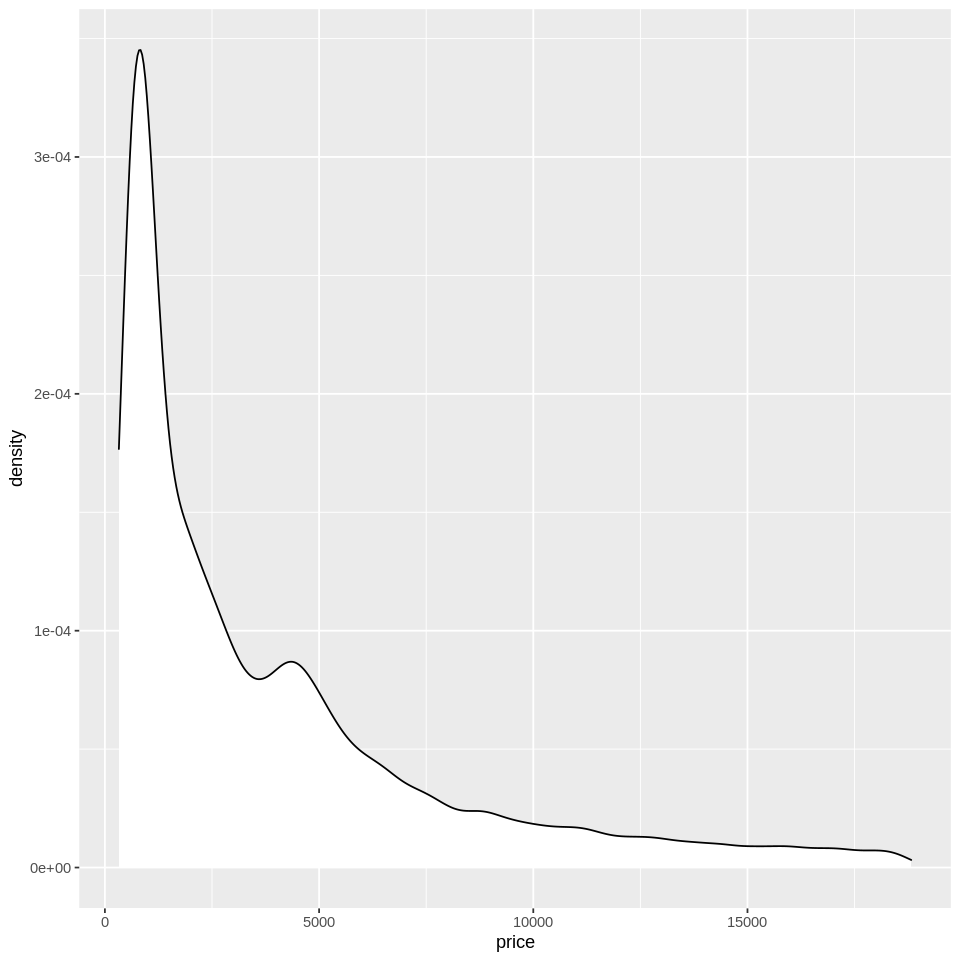

In [ ]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=carat)) +
    geom_histogram(fill='white',color='black') #histogram

ggplot(diamonds, aes(x=price)) +
    geom_density(fill='white',color='black') #density plot

__*Note*__: When attributes such as fill or color are assigned outside of `aes`, they are not interpreted as a mapping. Instead, they apply to all of the data, which can be advantageous if you want consistent formatting. In this case we have a white histogram with black borders for all of the data.

Below is the transformed plot. Note that we are using the pipe to transform ``carat``, as explained in the previous tutorial on tidyverse and piping.

No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 5 rows containing missing values (geom_segment).”


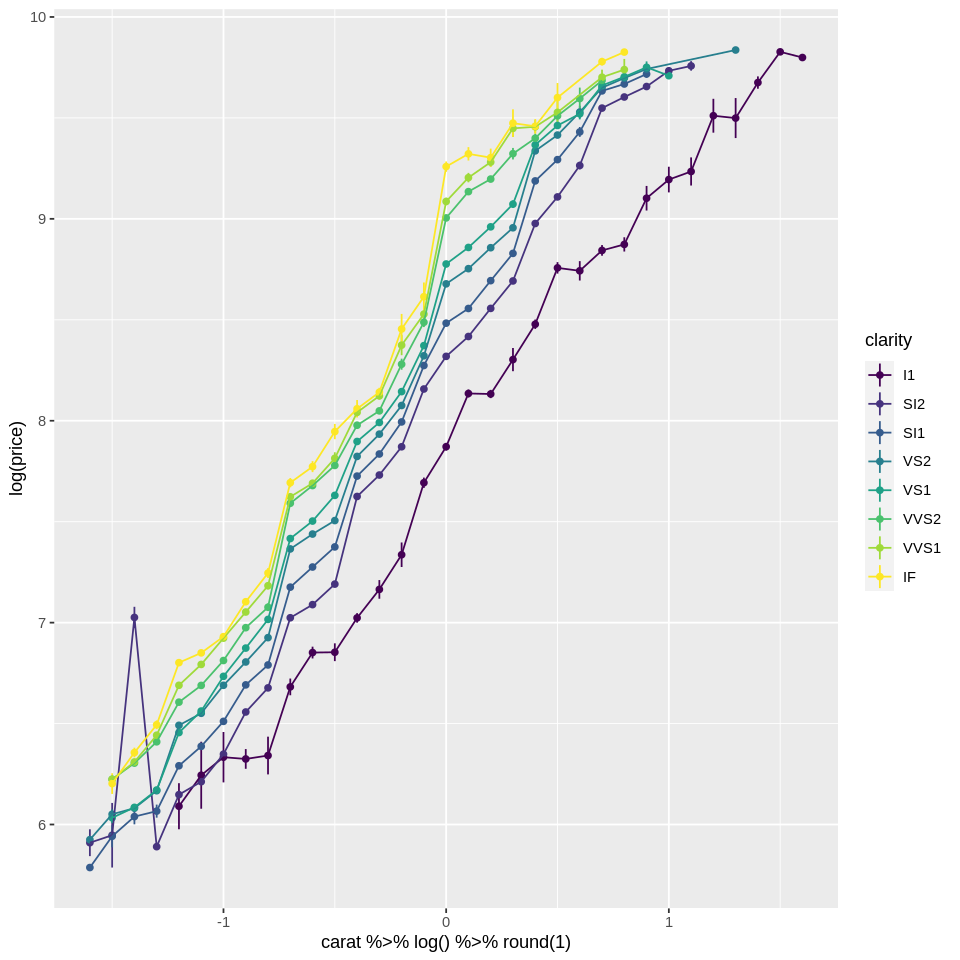

In [ ]:
library(tidyverse)
ggplot(diamonds, aes(x=carat  %>% log()  %>% round(1), y=log(price), color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point',fun=mean) +
    stat_summary(geom='line',fun=mean)

One good thing about tidyverse and ggplot is that ggplot also takes a dataframe as the first argument! If you remember from the [tidy data tutorial](https://coaxlab.github.io/Data-Explorations/notebooks/data-as-objects-and-architectures.html), you can chain tidyverse functions. In this case, to make the code clearer we could transform the variables with tidyverse, mutate,  then pass the result to ggplot like this:

No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 5 rows containing missing values (geom_segment).”


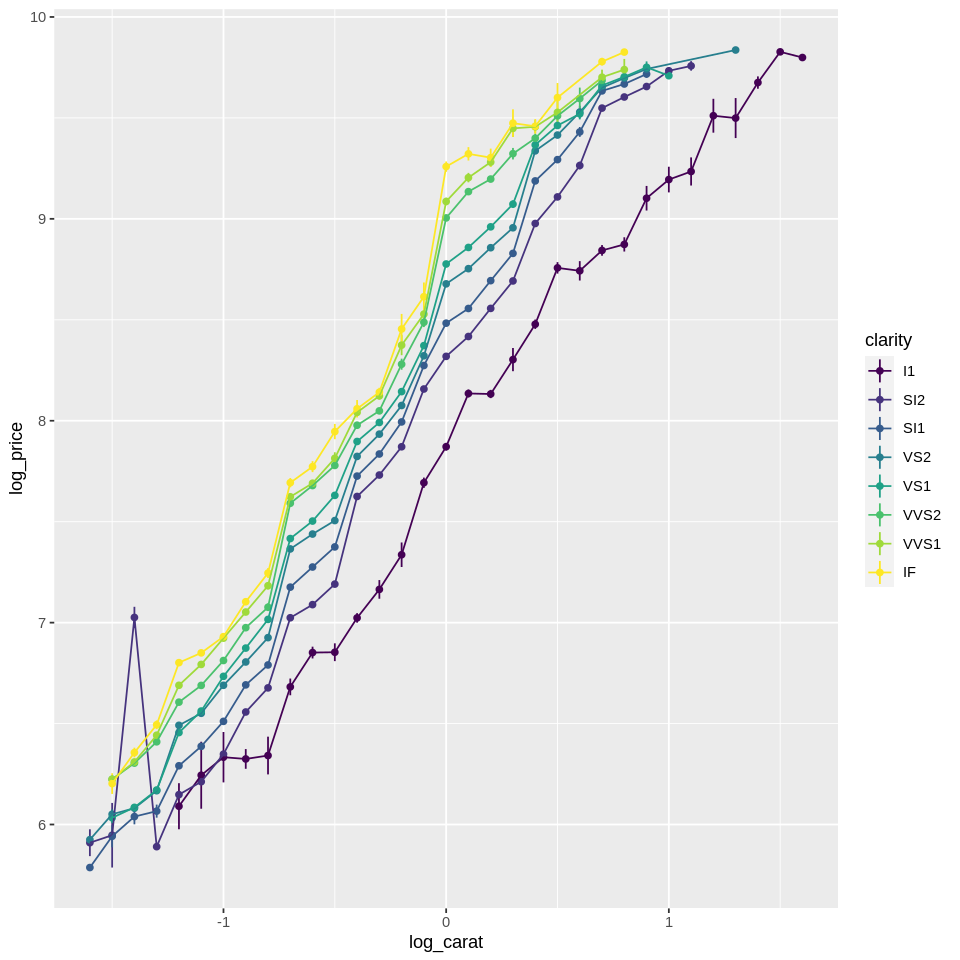

In [ ]:
diamonds %>%
    mutate(log_carat = carat  %>% log()  %>% round(1),
           log_price = log(price))  %>%
    ggplot(aes(x=log_carat, y=log_price, color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point',fun=mean) +
    stat_summary(geom='line',fun=mean)

### Distribution

We already saw how to create histograms and density plots. What if we want to show the distribution separately for multiple groups? There are many ways we can do that. One option is boxplots:

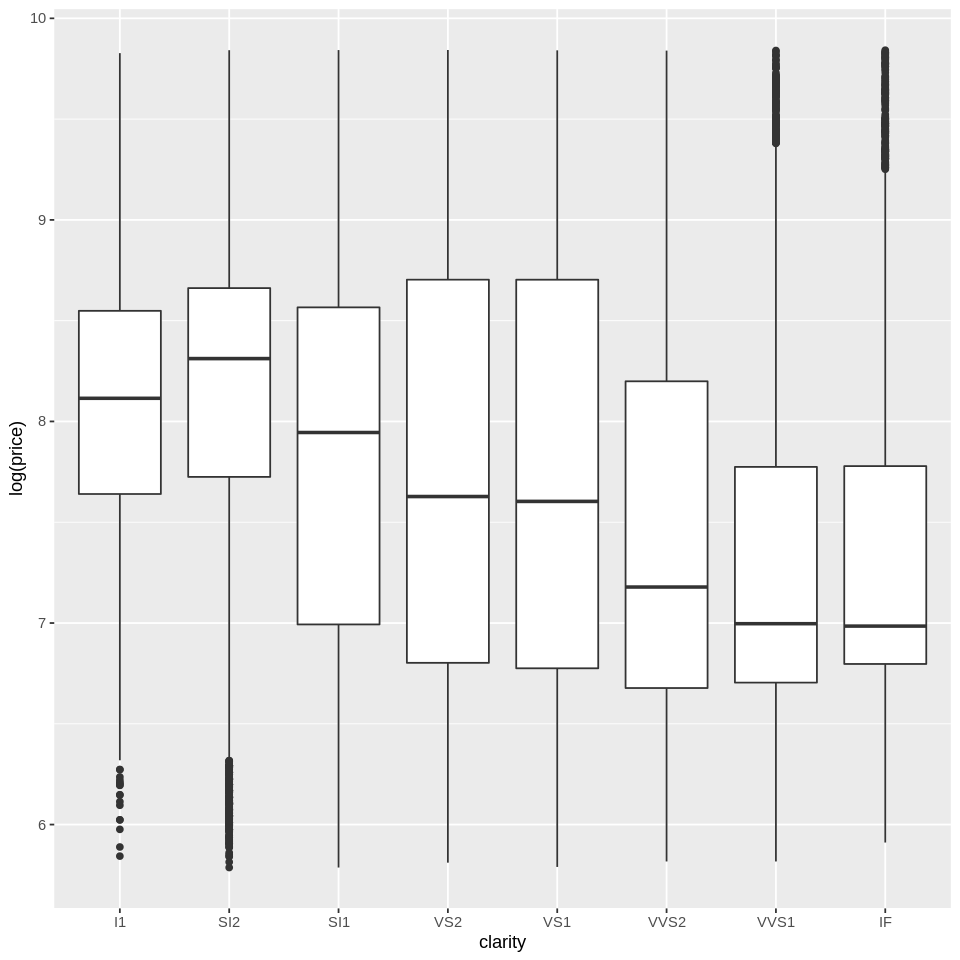

In [ ]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_boxplot()

We could also do violin plots:

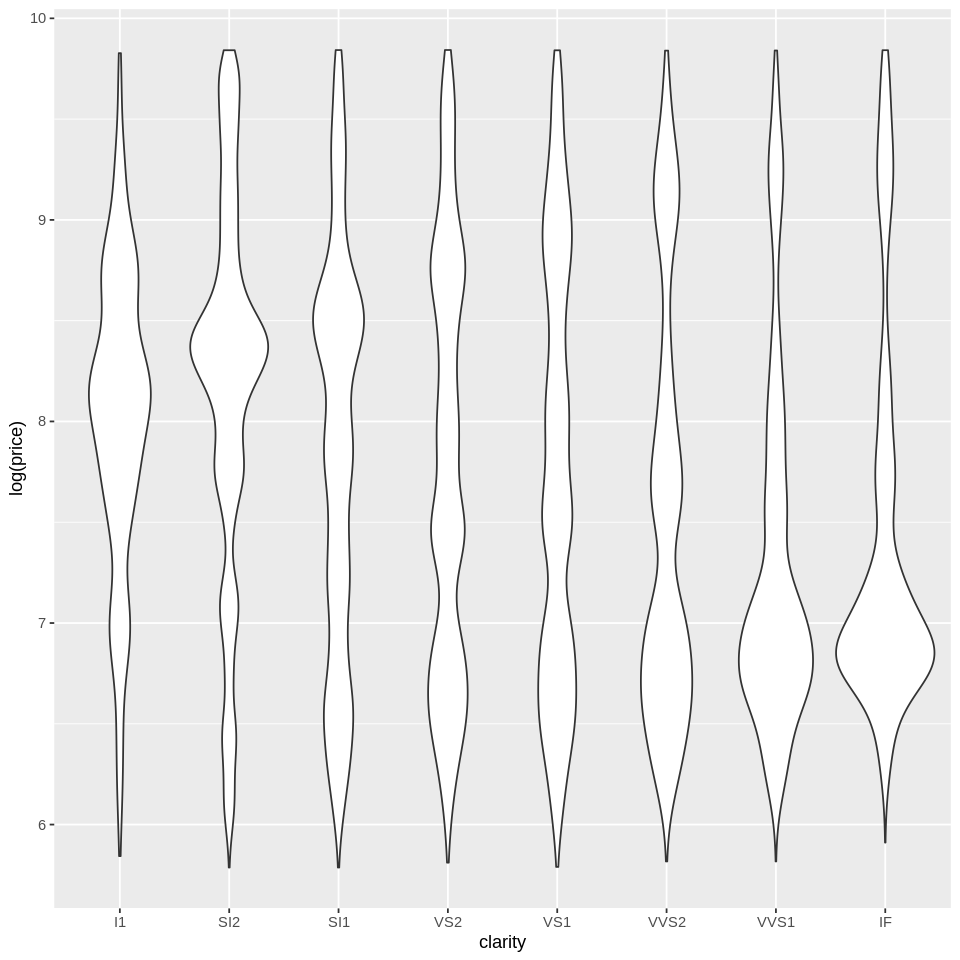

In [ ]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_violin()

One that I personally find useful when I'm feeling paranoid and want to be able to see *every* data point is this one:

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



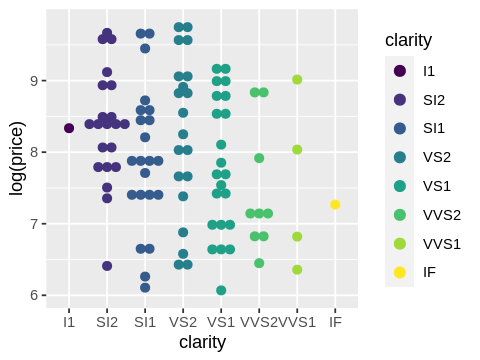

In [ ]:
ggplot(dsmall, aes(x=clarity,y=log(price),fill=clarity,col=clarity)) + geom_dotplot(binaxis="y",stackdir="center")

Visualizations like these are useful for helping you see what your data really look like before you start analyzing it and are often a bit of a reality check.

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, and Amy Sentis.*